# Data Collection for Volatility Spillover Analysis

**Purpose:** Download and prepare asset price data for cross-asset volatility spillover analysis

**Assets:**
- **Equities:** S&P 500 (^GSPC)
- **Fixed Income:** iShares 7-10 Year Treasury ETF (IEF)
- **Commodities:** Gold (GC=F), Crude Oil (CL=F), Natural Gas (NG=F), Wheat (ZW=F)
- **ESG:** Invesco WilderHill Clean Energy ETF (PBW)

**Sample Period:** 2005-01-01 to 2025-06-30

---

## Download Commodity Futures Data

In [9]:
import pandas as pd
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
# Define commodity futures tickers and names
tickers = {
    "Gold": "GC=F",
    "Wheat": "ZW=F",
    "Natural_Gas": "NG=F",
    "Crude_Oil": "CL=F"
}
start_date = "2005-01-01"
end_date = "2025-06-30"

# Initialize empty DataFrame
commodities = pd.DataFrame()

# Download and merge Close prices
for name, ticker in tickers.items():
    data = yf.download(ticker, start=start_date, end=end_date)[['Close']]
    data.rename(columns={"Close": name}, inplace=True)
    if commodities.empty:
        commodities = data
    else:
        commodities = commodities.join(data, how='outer')

# Reset index to ensure 'Date' is a column
commodities.reset_index(inplace=True)

# Save to CSV
commodities.to_csv("commodities_futures_close_price.csv", index=False)
print("Saved to 'commodities_futures_close_price.csv'")


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GC=F']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ZW=F']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NG=F']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CL=F']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Saved to 'commodities_futures_close_price.csv'


## Download Treasury ETF Data

In [42]:
# IEF ETF settings
ticker = "IEF"
start_date = "2005-01-01"
end_date = "2025-06-30"

# Download close price
ief = yf.download(ticker, start=start_date, end=end_date)[['Close']]
ief.rename(columns={"Close": "IEF"}, inplace=True)
ief.reset_index(inplace=True)

# Save to CSV
ief.to_csv("ief_close.csv", index=False)
print("Saved to 'ief_close.csv'")


[*********************100%***********************]  1 of 1 completed

Saved to 'ief_close.csv'


## Download S&P 500 Data

In [63]:
import yfinance as yf
import pandas as pd

# Download true S&P 500 close prices
sp500 = yf.download("^GSPC", start="2005-01-01", end="2025-06-30")[['Close']]
sp500.rename(columns={"Close": "S&P_500"}, inplace=True)
sp500.reset_index(inplace=True)

# Save correctly
sp500.to_csv("sp500_close.csv", index=False)
print("Correct 'sp500_close.csv' saved.")


[*********************100%***********************]  1 of 1 completed

Correct 'sp500_close.csv' saved.


In [70]:
# Load without parsing to inspect raw structure
sp500_raw = pd.read_csv("sp500_close.csv", header=None)

# Display the first few rows to diagnose structure
sp500_raw.head(10)


,0,1
0,Date,S&P_500
1,NaN,^GSPC
2,2005-01-03,1202.0799560546875
3,2005-01-04,1188.050048828125
4,2005-01-05,1183.739990234375
5,2005-01-06,1187.8900146484375
6,2005-01-07,1186.18994140625
7,2005-01-10,1190.25
8,2005-01-11,1182.989990234375
9,2005-01-12,1187.699951171875


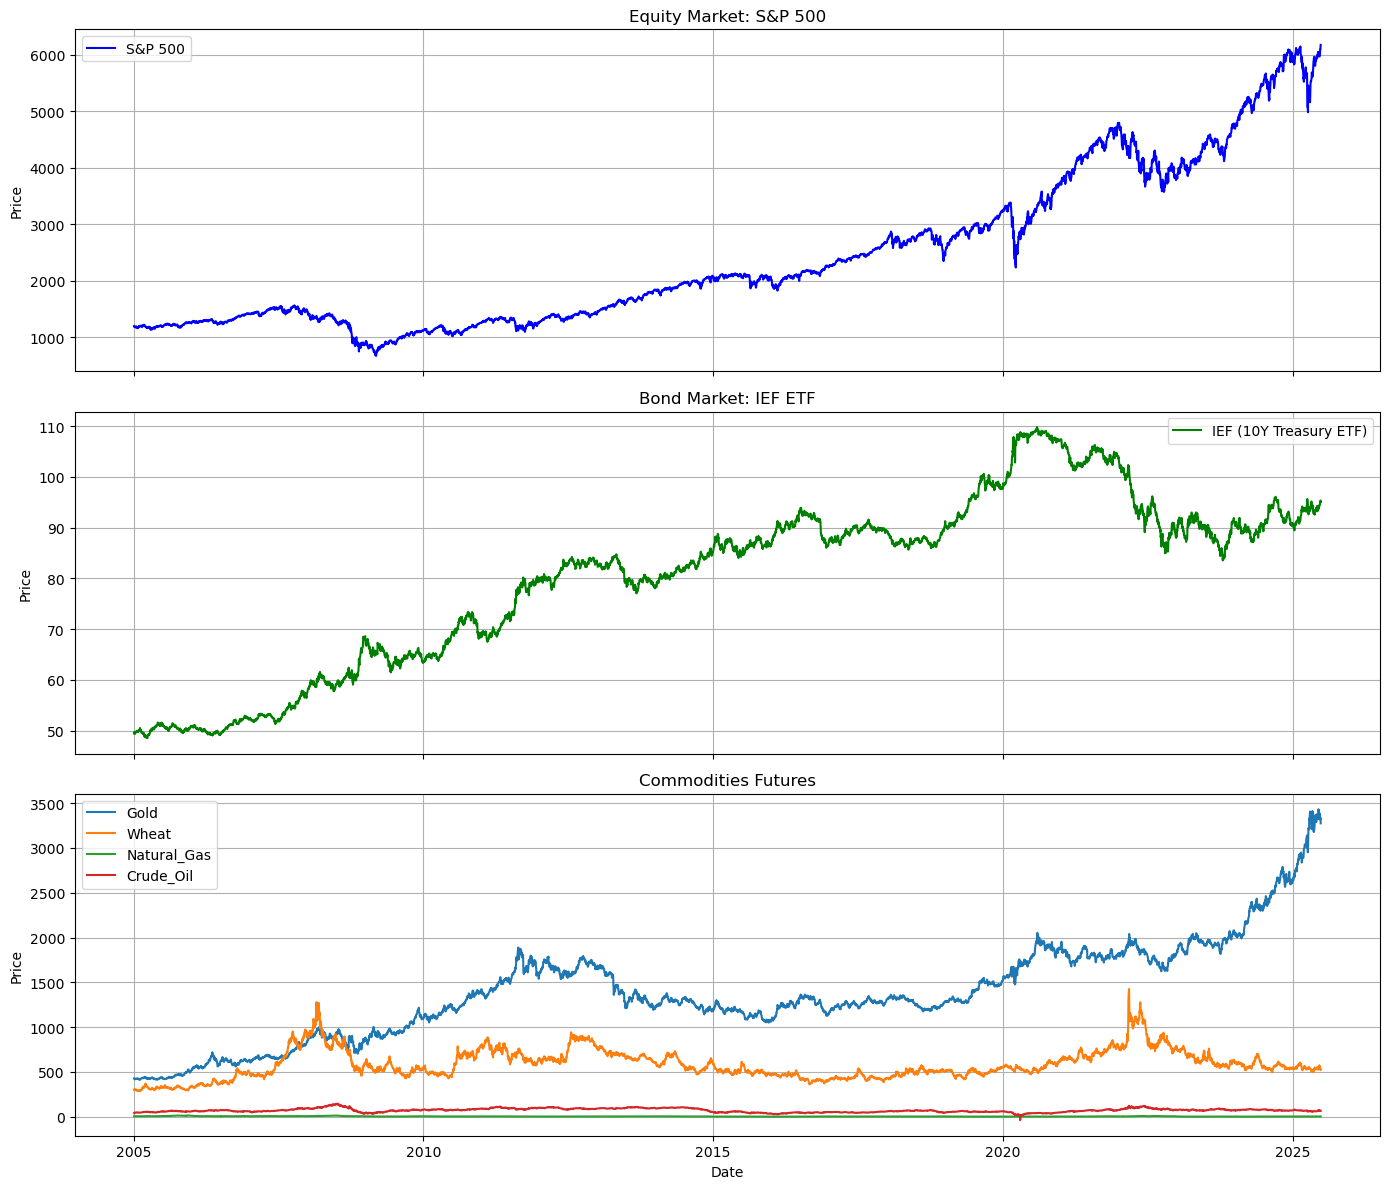

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# File paths
sp500_file = "sp500_close.csv"
ief_file = "ief_close.csv"
commodities_file = "commodities_futures_close_price.csv"

# Load each CSV, skipping the second header row
sp500 = pd.read_csv(sp500_file, skiprows=[1], parse_dates=['Date'], index_col='Date')
ief   = pd.read_csv(ief_file,   skiprows=[1], parse_dates=['Date'], index_col='Date')
commodities = pd.read_csv(commodities_file, skiprows=[1], parse_dates=['Date'], index_col='Date')

# Rename columns if necessary
sp500.columns = ["S&P_500"]
ief.columns   = ["IEF"]

# Ensure numeric types
commodities = commodities.astype(float)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Equities
axs[0].plot(sp500.index, sp500['S&P_500'], label='S&P 500', color='blue')
axs[0].set_title('Equity Market: S&P 500')
axs[0].set_ylabel('Price')
axs[0].legend()
axs[0].grid(True)

# Bonds
axs[1].plot(ief.index, ief['IEF'], label='IEF (10Y Treasury ETF)', color='green')
axs[1].set_title('Bond Market: IEF ETF')
axs[1].set_ylabel('Price')
axs[1].legend()
axs[1].grid(True)

# Commodities
for commodity in commodities.columns:
    axs[2].plot(commodities.index, commodities[commodity], label=commodity)
axs[2].set_title('Commodities Futures')
axs[2].set_ylabel('Price')
axs[2].legend()
axs[2].grid(True)

# Format x-axis
axs[2].xaxis.set_major_locator(mdates.YearLocator(5))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel('Date')

plt.tight_layout()
plt.show()


## Download PBW Data

In [85]:
import yfinance as yf
import pandas as pd

# Define the ticker and date range
ticker = "PBW"
start_date = "2005-03-03"
end_date = "2025-06-30"

# Download daily close prices
esg = yf.download(ticker, start=start_date, end=end_date)[['Close']]
esg.rename(columns={"Close": "PBW"}, inplace=True)
esg.reset_index(inplace=True)

# Save to CSV with requested filename
esg.to_csv("ESG Index.csv", index=False)

print("Data saved to 'ESG Index.csv'")


[*********************100%***********************]  1 of 1 completed

Data saved to 'ESG Index.csv'


## Merge All Assets

In [88]:
import pandas as pd

# 1. Load each CSV with Date as index
sp500 = pd.read_csv("sp500_close.csv", parse_dates=["Date"], index_col="Date")
ief = pd.read_csv("ief_close.csv", parse_dates=["Date"], index_col="Date")
commodities = pd.read_csv("commodities_futures_close_price.csv", parse_dates=["Date"], index_col="Date")
esg = pd.read_csv("ESG Index.csv", parse_dates=["Date"], index_col="Date")

# 2. Rename columns for consistency
sp500.columns = ["S&P_500"]
ief.columns = ["IEF"]
esg.columns = ["PBW"]  # Clean energy ETF

# 3. Merge all with inner join to align dates
all_assets = pd.concat([sp500, ief, commodities, esg], axis=1, join="inner")

# 4. Inspect aligned date range
print("Aligned date range:", all_assets.index.min(), "to", all_assets.index.max())

# 5. Save merged DataFrame to CSV
all_assets.to_csv("all_assets_close_aligned.csv")
print("Merged dataset saved to 'all_assets_close_aligned.csv'")


Aligned date range: 2005-03-03 00:00:00 to 2025-06-27 00:00:00
Merged dataset saved to 'all_assets_close_aligned.csv'


## Compute the Log Returns

In [97]:
import pandas as pd
import numpy as np

# 1. Load your aligned price data
prices = pd.read_csv("all_assets_close_aligned.csv", parse_dates=["Date"], index_col="Date")

# 2. Convert all columns to numeric (coercing any stray strings to NaN)
prices = prices.apply(pd.to_numeric, errors="coerce")

# 3. Drop any rows that turned entirely NaN (if needed)
prices = prices.dropna(how="all")

# 4. Compute log returns
log_returns = np.log(prices / prices.shift(1)).dropna()

# 5. Save to CSV
log_returns.to_csv("all_assets_log_returns.csv")

print("Log returns saved to 'all_assets_log_returns.csv'")


Log returns saved to 'all_assets_log_returns.csv'


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


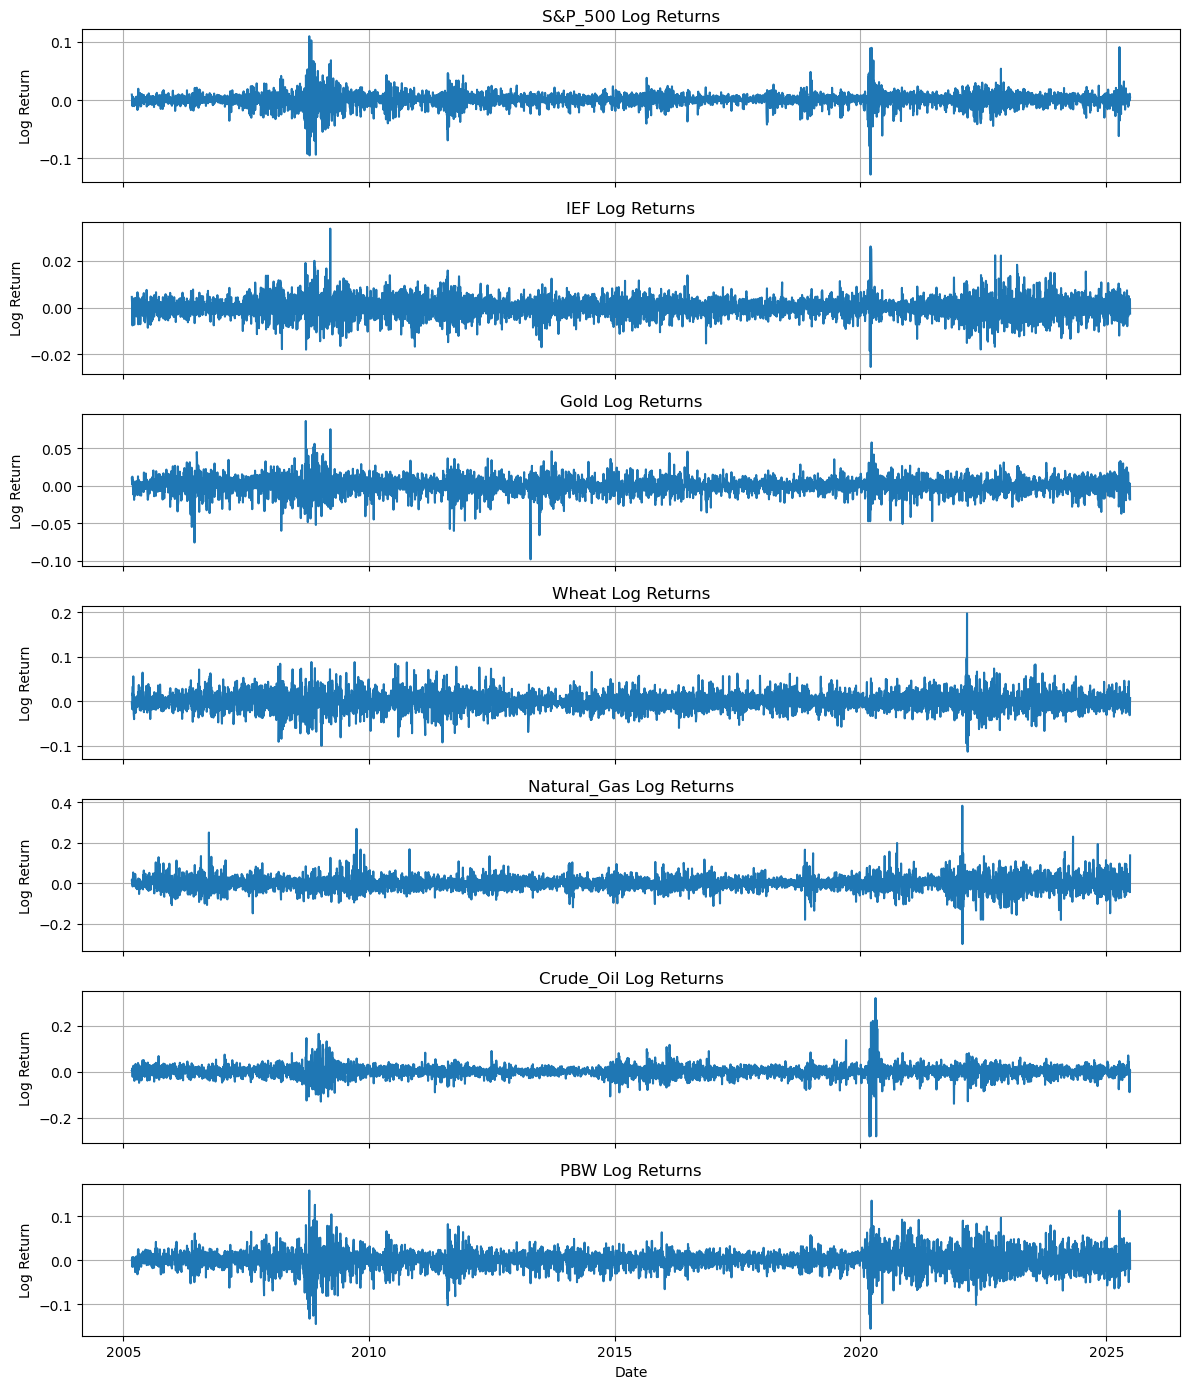

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the cleaned log returns
log_returns = pd.read_csv("all_assets_log_returns_cleaned.csv", parse_dates=["Date"], index_col="Date")

# Prepare subplots: one plot per asset
assets = log_returns.columns
fig, axs = plt.subplots(len(assets), 1, figsize=(12, 2 * len(assets)), sharex=True)

# Plot each asset's log returns
for ax, asset in zip(axs, assets):
    ax.plot(log_returns.index, log_returns[asset])
    ax.set_title(f"{asset} Log Returns")
    ax.set_ylabel("Log Return")
    ax.grid(True)

# Format x-axis on the last subplot
axs[-1].xaxis.set_major_locator(mdates.YearLocator(5))
axs[-1].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.xlabel("Date")
plt.tight_layout()
plt.show()


## Stationarity Testing

Test whether return series are stationary using ADF and KPSS tests.

- **ADF Test:** H0 = Unit Root (reject if p < 0.05)
- **KPSS Test:** H0 = Stationary (reject if stat > critical value)

In [109]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load the cleaned log returns
lr = pd.read_csv("all_assets_log_returns_cleaned.csv", 
                 parse_dates=["Date"], index_col="Date")

# 1) Descriptive stats (count, mean, std, min, 25%, 50%, 75%, max)
desc = lr.describe().T

# 2) Add skewness and excess kurtosis
desc["skew"] = lr.apply(skew)
desc["kurtosis_excess"] = lr.apply(lambda x: kurtosis(x, fisher=True))

# 3) (Optional) Annualize mean & volatility
# Assume ~252 trading days
desc["ann_mean"] = desc["mean"] * 252
desc["ann_vol"]  = desc["std"] * (252**0.5)

print(desc)


              count      mean       std       min       25%       50%  \
S&P_500      5093.0  0.000336  0.012228 -0.127652 -0.004096  0.000740   
IEF          5093.0  0.000127  0.004326 -0.025392 -0.002482  0.000271   
Gold         5093.0  0.000389  0.011232 -0.098206 -0.004879  0.000528   
Wheat        5093.0  0.000076  0.021009 -0.112971 -0.012613 -0.000773   
Natural_Gas  5093.0 -0.000111  0.036329 -0.300480 -0.019870 -0.000670   
Crude_Oil    5093.0  0.000173  0.026233 -0.282206 -0.012438  0.001088   
PBW          5093.0 -0.000156  0.023119 -0.156373 -0.012063  0.001233   

                  75%       max      skew  kurtosis_excess  ann_mean   ann_vol  
S&P_500      0.005734  0.109572 -0.472725        13.025444  0.084795  0.194107  
IEF          0.002649  0.033688  0.107321         2.610830  0.031894  0.068669  
Gold         0.006285  0.086432 -0.331637         5.240268  0.098094  0.178303  
Wheat        0.012102  0.197014  0.264121         3.148948  0.019174  0.333503  
Natural_Ga

In [117]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

# Suppose `lr` is a pandas Series of log returns
lr = pd.read_csv("all_assets_log_returns.csv", index_col="Date", parse_dates=True)["S&P_500"]

# ADF test
adf_stat, adf_p, _, _, adf_crit, _ = adfuller(lr)
print("ADF p-value:", adf_p)

# KPSS test
kpss_stat, kpss_p, _, kpss_crit = kpss(lr, regression='c')
print("KPSS p-value:", kpss_p)

stat, p, lags, crit = kpss(lr, regression='c', nlags='auto')
print("KPSS stat:", stat)
print("KPSS crit values:", crit)

import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

# Load your log returns
lr = pd.read_csv("all_assets_log_returns_cleaned.csv", parse_dates=["Date"], index_col="Date")

results = []
for asset in lr.columns:
    series = lr[asset].dropna()
    adf_stat, adf_p, _, _, adf_crit, _ = adfuller(series, regression='c', autolag='AIC')
    kpss_stat, kpss_p, _, kpss_crit = kpss(series, regression='c', nlags='auto')
    results.append({
        "Asset": asset,
        "ADF p-value": adf_p,
        "KPSS stat": kpss_stat,
        "KPSS p-value": kpss_p,
        "KPSS 5% crit": kpss_crit['5%']
    })

stationarity_df = pd.DataFrame(results).set_index("Asset")
print(stationarity_df)


ADF p-value: 2.6803852254784978e-30
KPSS p-value: 0.1
KPSS stat: 0.18376854975134485
KPSS crit values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/var/folders/sx/h_wm6hkd62ggbtyknb8xbvbh0000gn/T/ipykernel_95751/492702116.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, kpss_crit = kpss(lr, regression='c')
/var/folders/sx/h_wm6hkd62ggbtyknb8xbvbh0000gn/T/ipykernel_95751/492702116.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p, lags, crit = kpss(lr, regression='c', nlags='auto')
/var/folders/sx/h_wm6hkd62ggbtyknb8xbvbh0000gn/T/ipykernel_95751/492702116.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, kpss_crit = kpss(series, regression='c', nlags='auto')
/var/folders/sx/h_wm6hkd62ggbtyknb8xbvbh0000gn/T/i

              ADF p-value  KPSS stat  KPSS p-value  KPSS 5% crit
Asset                                                           
S&P_500      2.666070e-30   0.181663           0.1         0.463
IEF          0.000000e+00   0.338545           0.1         0.463
Gold         0.000000e+00   0.157601           0.1         0.463
Wheat        0.000000e+00   0.097488           0.1         0.463
Natural_Gas  3.381893e-28   0.039595           0.1         0.463
Crude_Oil    1.547017e-23   0.048070           0.1         0.463
PBW          0.000000e+00   0.101127           0.1         0.463


/var/folders/sx/h_wm6hkd62ggbtyknb8xbvbh0000gn/T/ipykernel_95751/492702116.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, kpss_crit = kpss(series, regression='c', nlags='auto')
/var/folders/sx/h_wm6hkd62ggbtyknb8xbvbh0000gn/T/ipykernel_95751/492702116.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, kpss_crit = kpss(series, regression='c', nlags='auto')


In [122]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

# Load your log returns
lr = pd.read_csv("all_assets_log_returns_cleaned.csv", parse_dates=["Date"], index_col="Date")

results = []
for asset in lr.columns:
    series = lr[asset].dropna()
    adf_stat, adf_p, _, _, adf_crit, _ = adfuller(series, regression='c', autolag='AIC')
    kpss_stat, kpss_p, _, kpss_crit = kpss(series, regression='c', nlags='auto')
    results.append({
        "Asset": asset,
        "ADF p-value": adf_p,
        "KPSS stat": kpss_stat,
        "KPSS p-value": kpss_p,
        "KPSS 5% crit": kpss_crit['5%']
    })

stationarity_df = pd.DataFrame(results).set_index("Asset")
print(stationarity_df)


/var/folders/sx/h_wm6hkd62ggbtyknb8xbvbh0000gn/T/ipykernel_95751/1883316011.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, kpss_crit = kpss(series, regression='c', nlags='auto')
/var/folders/sx/h_wm6hkd62ggbtyknb8xbvbh0000gn/T/ipykernel_95751/1883316011.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, kpss_crit = kpss(series, regression='c', nlags='auto')
/var/folders/sx/h_wm6hkd62ggbtyknb8xbvbh0000gn/T/ipykernel_95751/1883316011.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, kpss_crit = kpss(series, regression='c', nlags='auto')
/var/folders/

              ADF p-value  KPSS stat  KPSS p-value  KPSS 5% crit
Asset                                                           
S&P_500      2.666070e-30   0.181663           0.1         0.463
IEF          0.000000e+00   0.338545           0.1         0.463
Gold         0.000000e+00   0.157601           0.1         0.463
Wheat        0.000000e+00   0.097488           0.1         0.463
Natural_Gas  3.381893e-28   0.039595           0.1         0.463
Crude_Oil    1.547017e-23   0.048070           0.1         0.463
PBW          0.000000e+00   0.101127           0.1         0.463


/var/folders/sx/h_wm6hkd62ggbtyknb8xbvbh0000gn/T/ipykernel_95751/1883316011.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, kpss_crit = kpss(series, regression='c', nlags='auto')


## Summary

✓ Downloaded price data for 7 assets  
✓ Verified stationarity of return series  
✓ All series stationary (suitable for GARCH)

**Output files:**
- `sp500_close.csv`
- `ief_close.csv`
- `commodities_futures_close_price.csv`
- `all_assets_log_returns_cleaned.csv`
- 'all_assets_cl

**Next:** Proceed to GARCH fitting notebook